In [2]:
#-*-coding:utf-8-*-
from GameEnv import Game2048
from DQN_resnet import DQN
import random
import copy
import os
import numpy as np

# 策略迭代测试
def check_one_game_with_model(gameEnv,model,debug):
    gameEnv.reset()
    observation = copy.deepcopy(gameEnv.matrix)
    while True:
        if debug:gameEnv.display()
        sort_res = model.get_action([observation],"eval","sort_res")
#         probs = model.sess.run(model.predictions, feed_dict={model.matrixInput:np.array(([RL.transform(observation)]))})[0]
#         probs = model.sess.run(model.predictions, feed_dict={model.matrixInput:np.array([observation])})[0]
#         res_dict = {i:k for i,k in zip( ["a","s","w","d"],probs)}
#         sort_res = sorted(res_dict.items(),key = lambda x:x[1],reverse = True) 
        for action,probs in sort_res:
            observation_, reward, done = gameEnv.step(action)
            if observation_ != observation:
                break
        if debug:print "choose:",action,probs
        observation = copy.deepcopy(observation_)
        if debug:print("_________________________________________")
        if done:
            if debug:gameEnv.display()
            if debug:print("this_score_____________________:",gameEnv.score)
            break
    return gameEnv.score

import tensorflow as tf



def evaluate(gameEnv,model,n=100):
    scores = []
    max_num = []
    for i in range(n):
        scores.append(check_one_game_with_model(gameEnv,model,False))
        max_num.append(np.max(gameEnv.matrix))
    print "--------------------------avg_top:%f max_top:%d avg:%d max:%d min:%d e:%f episode:%d memory_size:%d lr:%f"%(np.average(max_num),np.max(max_num), np.average(scores),np.max(scores), np.min(scores), model.e,model.episode,len(model.memory),model.sess.run(model.learning_rate))
    saver.save(RL.sess, "models/net_1")


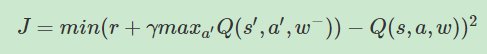

In [ ]:
gameEnv = Game2048(4,"score")
RL = DQN(learning_rate=0.0005,sigma=1,grid_n = 4,batch_size=512,h1 = 256,input_type="one-hot",loss_type="mse",replace_update_fre=100,
         dqn_type = "double_dqn",
         net_type = "2conv",
         data_rotate_expand = False,       
         loss_show_step=500,
                greedy_min=0.000001,
                memory_max_size=6000)
saver = tf.train.Saver()
flag = False
for episode in range(200000):
    RL.episode += 1
    # 初始化环境
#     if episode > 1000:
#         gameEnv.reset(random.choice(RL.memory)[0])
#     else:
    gameEnv.reset()
    observation = copy.deepcopy(gameEnv.matrix)
    while True:
        # DQN 根据观测值选择行为
        if flag:
            l = ["a","w","s","d"]
            l.remove(action)
            action = random.choice(l)
        else:
            action = RL.get_action([observation],"train","action")   
        # 环境根据行为给出下一个 state, reward, 是否终止
        observation_, reward, done = gameEnv.step(action)
        # DQN 存储记忆
        RL.experience_store_expand(observation, action, reward,done,observation_)
        # 控制学习起始时间和频率 (先累积一些记忆再开始学习)
        RL.train()
        # 将下一个 state_ 变为 下次循环的 state
        flag = True if observation_ == observation else False
        observation = copy.deepcopy(observation_)
        # 如果终止, 就跳出循环
        RL.total_iters += 1
        if done:
            break
#     if  RL.episode > 300:
#         for i in range(10):
#             RL.train()
            
    if RL.episode % 1000 == 0 and RL.episode > 300:
        status1 = [[2, 4, 16, 2], [16, 64, 512, 8], [4, 2, 32, 2], [32, 4, 2, 4]]
        status2 = [[0,0,0,0],[0,0,0,0],[0,2,0,0],[4,0,0,4]]
        status3 = [[0,0,0,0],[0,0,0,0],[0,2,2,0],[4,0,0,4]]
        status4 = [[0,0,0,0],[0,0,0,0],[0,2,0,0],[0,2,0,0]]
        status5 = [[2, 4, 16, 2], [16, 64, 512, 8], [4, 2, 32, 2], [32, 4, 2, 0]]
        for status_i in [status1,status5,status2,status3,status4]:
            print RL.sess.run([RL.current_predictions], feed_dict={RL.matrixInput:np.array(np.array(([RL.transform_input(status_i)])))})[0]
        evaluate(gameEnv,RL)



Instructions for updating:
Use `argmax` instead
[[0.3109657  0.3020704  0.4008151  0.41267037]]
[[0.31461743 0.3044284  0.38862196 0.41077524]]
[[0.22207057 0.22438808 0.2432726  0.3463216 ]]
[[0.24860254 0.22399864 0.26795366 0.34325805]]
[[0.2255821  0.22833414 0.23818722 0.32501554]]
--------------------------avg_top:79.360000 max_top:256 avg:758 max:2848 min:136 e:0.763418 episode:1000 memory_size:5562 lr:0.000500
[[0.3606507  0.51029944 0.44734073 0.29843077]]
[[0.3580538  0.51453465 0.45585623 0.35430467]]
[[0.334453   0.35416517 0.36649966 0.29490882]]
[[0.45940322 0.4402265  0.35598058 0.42548916]]
[[0.24922411 0.46057495 0.41253933 0.2500836 ]]
--------------------------avg_top:127.680000 max_top:256 avg:1261 max:2916 min:272 e:0.634773 episode:2000 memory_size:5511 lr:0.000500
('loss', 500, 0.040534213)
[[0.51013505 0.44346222 0.45200402 0.5962844 ]]
[[0.47605318 0.58722055 0.39325827 0.73487335]]
[[0.6004672 0.4148956 0.5533624 0.570509 ]]
[[0.74760634 0.52035946 0.6235466  

('loss', 6500, 1.9205351)
[[2.9390852 2.116975  1.7057002 3.146812 ]]
[[ 6.958836  10.369872   6.6294484 11.45375  ]]
[[35.292847 36.169567 36.827477 35.543102]]
[[35.527355 36.280987 36.740135 35.580795]]
[[35.41028  36.340015 36.40565  35.55088 ]]
--------------------------avg_top:308.480000 max_top:512 avg:3340 max:6648 min:560 e:0.000000 episode:22000 memory_size:5507 lr:0.000471
('loss', 7000, 1.7101856)
[[2.471092   5.1780663  3.2597659  0.14492065]]
[[ 6.7033114 14.48905    8.593699  10.908045 ]]
[[38.40381  39.044914 39.144382 38.951263]]
[[38.687183 39.60819  39.39594  39.173336]]
[[38.444195 38.92267  38.773697 38.83568 ]]
--------------------------avg_top:286.400000 max_top:512 avg:3130 max:6696 min:324 e:0.000000 episode:23000 memory_size:5672 lr:0.000466
[[ 1.2084804   2.289959    0.66304386 -2.8021646 ]]
[[ 5.7887053 12.371368   6.2893214  9.487705 ]]
[[41.36886  41.260624 41.361015 41.599808]]
[[41.309437 42.000996 41.72665  41.577152]]
[[41.59368  41.812473 41.033424 41

In [ ]:
res = np.array(random.sample(RL.memory, RL.batch_size)).tolist()

In [4]:
RL.memory.pop(len(RL.memory)-1)

[[[8, 0, 0, 0], [16, 0, 0, 2], [4, 4, 8, 0], [2, 16, 4, 0]],
 'd',
 0.3169925001442312,
 False,
 [[0, 0, 0, 8], [0, 0, 16, 2], [2, 0, 8, 8], [0, 2, 16, 4]]]

In [1]:
gameEnv.display(gameEnv.max_matrix)

NameError: name 'gameEnv' is not defined

In [6]:
evaluate(gameEnv,RL)

--------------------------avg_top:102.720000 max_top:256 avg:1006 max:2744 min:216 e:0.254187 episode:1657 memory_size:6753


In [9]:
RL.episode

1718

In [4]:
check_one_game_with_model(gameEnv,RL,True)

2	 -	 -	 -	 

-	 -	 2	 -	 

-	 -	 -	 -	 

-	 -	 -	 -	 

choose: w 4.247193
_________________________________________
2	 -	 2	 -	 

-	 -	 -	 -	 

-	 -	 -	 -	 

-	 2	 -	 -	 

choose: w 4.511757
_________________________________________
2	 2	 2	 -	 

-	 -	 -	 4	 

-	 -	 -	 -	 

-	 -	 -	 -	 

choose: d 4.876112
_________________________________________
-	 -	 4	 2	 

-	 -	 -	 4	 

-	 -	 2	 -	 

-	 -	 -	 -	 

choose: a 4.702132
_________________________________________
4	 2	 -	 -	 

4	 4	 -	 -	 

2	 -	 -	 -	 

-	 -	 -	 -	 

choose: d 4.788603
_________________________________________
4	 -	 4	 2	 

-	 -	 -	 8	 

-	 -	 -	 2	 

-	 -	 -	 -	 

choose: a 4.825366
_________________________________________
8	 2	 -	 2	 

8	 -	 -	 -	 

2	 -	 -	 -	 

-	 -	 -	 -	 

choose: s 4.7335863
_________________________________________
-	 -	 -	 -	 

-	 -	 -	 -	 

16	 -	 -	 -	 

2	 2	 2	 2	 

choose: d 4.639065
_________________________________________
4	 -	 -	 -	 

-	 -	 -	 -	 

-	 -	 -	 16	 

-	 -	 4	 4	 

choos

4	 64	 16	 4	 

32	 128	 -	 -	 

4	 8	 4	 -	 

choose: d 3.3837945
_________________________________________
8	 2	 32	 16	 

4	 64	 16	 4	 

-	 4	 32	 128	 

-	 4	 8	 4	 

choose: a 3.0271354
_________________________________________
8	 2	 32	 16	 

4	 64	 16	 4	 

4	 32	 128	 4	 

4	 8	 4	 -	 

choose: s 4.1192193
_________________________________________
-	 2	 32	 -	 

8	 64	 16	 2	 

8	 32	 128	 16	 

4	 8	 4	 8	 

choose: w 3.8415911
_________________________________________
16	 2	 32	 2	 

4	 64	 16	 16	 

-	 32	 128	 8	 

-	 8	 4	 2	 

choose: a 2.9116921
_________________________________________
16	 2	 32	 2	 

4	 64	 32	 4	 

32	 128	 8	 -	 

8	 4	 2	 -	 

choose: s 4.0598755
_________________________________________
16	 2	 2	 -	 

4	 64	 64	 -	 

32	 128	 8	 2	 

8	 4	 2	 4	 

choose: d 4.890331
_________________________________________
2	 -	 16	 4	 

-	 -	 4	 128	 

32	 128	 8	 2	 

8	 4	 2	 4	 

choose: w 4.271737
_________________________________________
2	 128	 16	 4	 

32

2780

In [15]:
print RL.get_action([observation]*100,"eval","sort_res")

[('s', 1036.5992), ('d', 652.64874), ('w', 229.1658), ('a', 29.73332)]


In [11]:
RL.sess.run(RL.learning_rate)

0.00011249552

In [3]:
gameEnv.max_score

4980

'models/model_name-924'